In [1]:
import numpy as np
import pandas as pd


In [2]:
data=pd.read_csv('hour.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# Check for null values in the data and drop records with NAs.


data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# if data is missing
data.dropna(inplace=True)

Sanity checks:
Check if registered + casual = cnt for all the records. If not, the row is junk and should be dropped.


In [7]:
data['registered']+data['casual']!=data['cnt']

0        False
1        False
2        False
3        False
4        False
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Length: 17379, dtype: bool

In [8]:
np.sum(data['registered']+data['casual']!=data['cnt'])

0

In [9]:
# Suppose i have to drop rows based on some condition, in this condition there is no 

# drop function

data.drop(data[data['registered']+data['casual']!=data['cnt']].index,inplace=True)


In [10]:
# Month values should be 1-12 only

data['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [11]:
# Hour values should be 0-23

data['hr'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

The variables ‘casual’ and ‘registered’ are redundant and need to be dropped. 
‘Instant’ is the index and needs to be dropped too. The date column dteday will not be used in the model building, 
and therefore needs to be dropped. Create a new dataframe named inp1

In [12]:
col_drop=['casual','registered','dteday','instant']
inp1=data.drop(col_drop,axis=1).copy()   # use copy method

In [13]:
inp1.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [14]:
inp1.shape


(17379, 13)

5. Univariate analysis: 

Describe the numerical fields in the dataset using pandas describe method.

Make density plot for temp. This would give a sense of the centrality and the spread of the distribution.

Boxplot for atemp 

Are there any outliers?

Histogram for hum

Do you detect any abnormally high values?

Density plot for windspeed

Box and density plot for cnt – this is the variable of interest 

Do you see any outliers in the boxplot? 

Does the density plot provide a similar insight?

In [15]:
# Describe the numerical fields in the dataset using pandas describe method.

inp1.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


<AxesSubplot:ylabel='Density'>

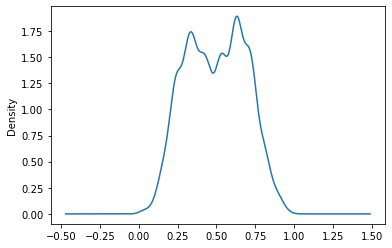

In [16]:
# Make density plot for temp. This would give a sense of the centrality and the spread of the distribution.

inp1.temp.plot.density()

C:\Users\akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='atemp'>

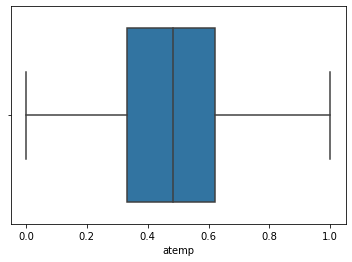

In [17]:
# Boxplot for atemp 

import seaborn as sns
sns.boxplot(inp1['atemp'])

# we dont have any outlier


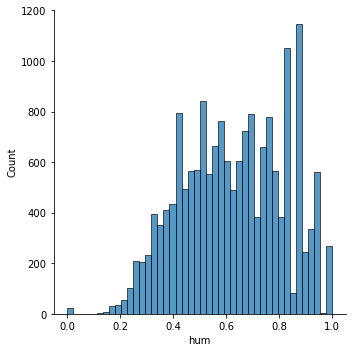

In [18]:
# Histogram for hum ??

## Do you detect any abnormally high values ??

sns.displot(inp1["hum"])

# left skewed data--- definately outlier is there

C:\Users\akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hum'>

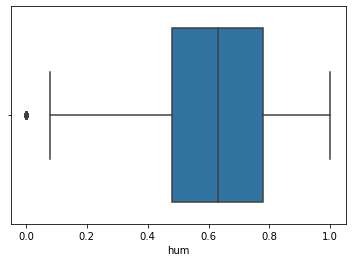

In [19]:
sns.boxplot(inp1['hum'])



C:\Users\akhilesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='windspeed', ylabel='Density'>

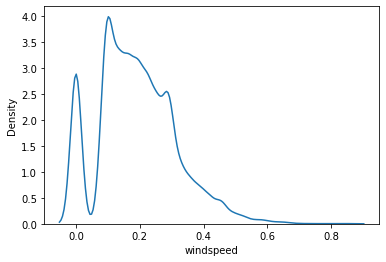

In [20]:
# Density plot for windspeed

sns.distplot(inp1['windspeed'], hist=False)


C:\Users\akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt'>

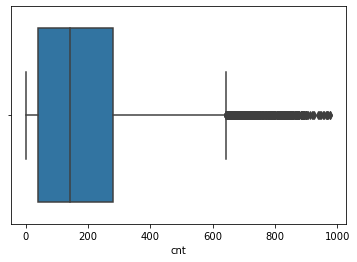

In [21]:
# Box and density plot for cnt – this is the variable of interest 
# Do you see any outliers in the boxplot? 
# Does the density plot provide a similar insight?

sns.boxplot(inp1.cnt)

# lot of outliers are there

6. Outlier treatment:  

Cnt looks like some hours have rather high values. You’ll need to treat these outliers so that they don’t skew the analysis and the model. 

Find out the following percentiles: 10, 25, 50, 75, 90, 95, 99

Decide the cutoff percentile and drop records with values higher than the cutoff. Name the new dataframe as inp2.



In [22]:

inp1.cnt.quantile([0.10,0.25,0.50,0.75,0.90,0.95,0.99])

# maximum outlier are comming after 600 in boxplot. so, selection will be 95 percentile

0.10      9.00
0.25     40.00
0.50    142.00
0.75    281.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: cnt, dtype: float64

In [23]:
inp2=inp1[inp1.cnt<563].copy()
inp2

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


C:\Users\akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt'>

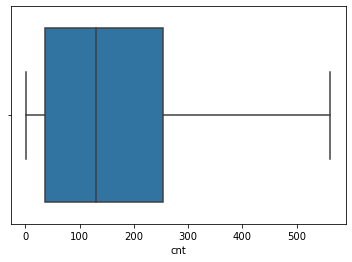

In [24]:
sns.boxplot(inp2.cnt)

# Now no outliers are there

7. Bivariate analysis

1.Make boxplot for cnt vs. hour

What kind of pattern do you see?

2.Make boxplot for cnt vs. weekday

Is there any difference in the rides by days of the week?

3.Make boxplot for cnt vs. month

Look at the median values. Any month(s) that stand out?

4.Make boxplot for cnt vs. season

Which season has the highest rides in general? Expected?

5.Make a bar plot with the median value of cnt for each hr

Does this paint a different picture from the box plot?

6.Make a correlation matrix for variables atemp, temp, hum, and windspeed

Which variables have the highest correlation?

In [25]:
import matplotlib.pyplot as plt

C:\Users\akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hr', ylabel='cnt'>

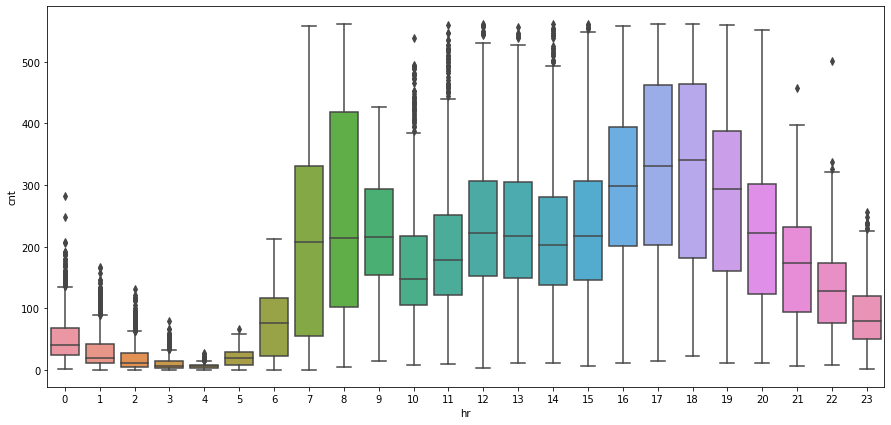

In [26]:

# 1.Make boxplot for cnt vs. hour. What kind of pattern do you see?


plt.figure(figsize=[15,7])
sns.boxplot("hr","cnt",data=inp2)


C:\Users\akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='cnt'>

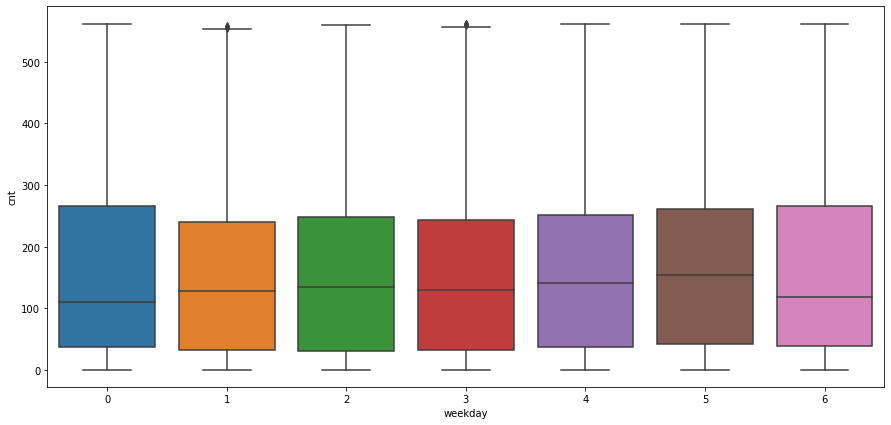

In [27]:


# 2.Make boxplot for cnt vs. weekday. Is there any difference in the rides by days of the week?


plt.figure(figsize=[15,7])
sns.boxplot("weekday","cnt",data=inp2)

C:\Users\akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mnth', ylabel='cnt'>

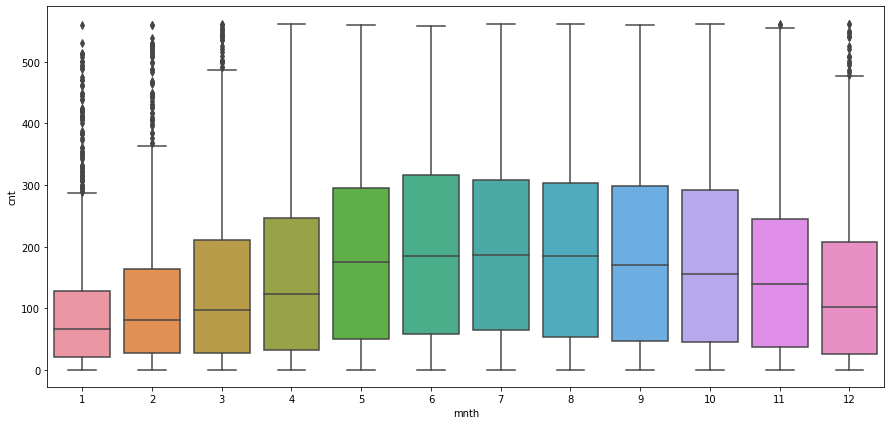

In [28]:
# 3.Make boxplot for cnt vs. month. Look at the median values. Any month(s) that stand out?

plt.figure(figsize=[15,7])
sns.boxplot("mnth","cnt",data=inp2)

In [29]:
inp2

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


C:\Users\akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='cnt'>

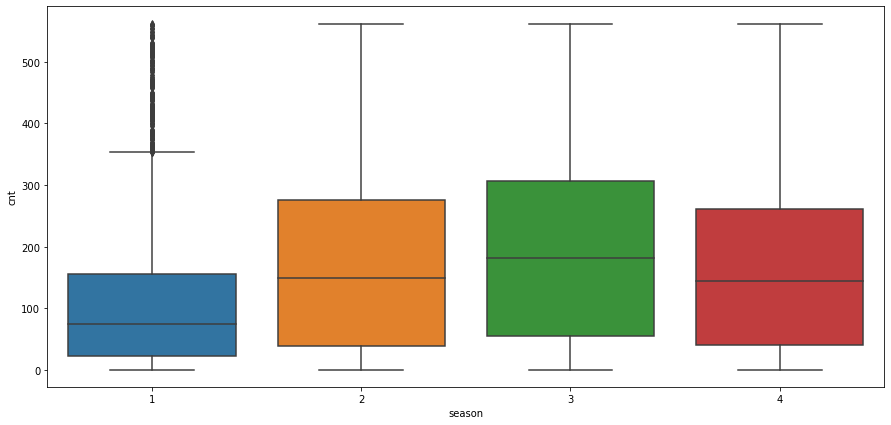

In [30]:
# 4.Make boxplot for cnt vs. season. Which season has the highest rides in general? Expected?

plt.figure(figsize=[15,7])
sns.boxplot("season","cnt",data=inp2)

<BarContainer object of 16502 artists>

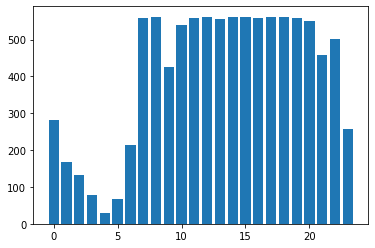

In [31]:

# 5.Make a bar plot with the median value of cnt for each hr. Does this paint a different picture from the box plot?

plt.bar(x='hr',height='cnt',data=inp2)


In [32]:

# 6.Make a correlation matrix for variables atemp, temp, hum, and windspeed. Which variables have the highest correlation?

col=['atemp', 'temp', 'hum', 'windspeed']
output=inp2[col].corr()


<AxesSubplot:>

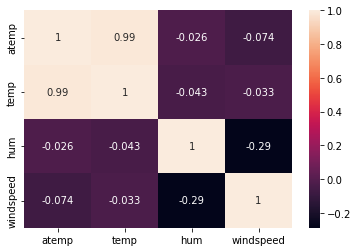

In [33]:
sns.heatmap(output,annot=True)


8. Data preprocessing

1.A few key considerations for the preprocessing: 

There are plenty of categorical features. Since these categorical features can’t be used in the predictive model, you need to convert to a suitable numerical representation. Instead of creating dozens of new dummy variables, try to club levels of categorical features wherever possible. For a feature with high number of categorical levels, you can club the values that are very similar in value for the target variable. 

2.Treating mnth column

For values 5,6,7,8,9,10 replace with a single value 5. This is because these have very similar values for cnt.

Get dummies for the updated 6 mnth values

3.Treating hr column

Create new mapping: 0-5: 0, 11-15: 11; other values are untouched. Again, the bucketing is done in a way that hr values with similar levels of cnt are treated the same.

Get dummy columns for season, weathersit, weekday, mnth, and hr. You needn’t club these further as the levels seem to have different values for the median cnt, when seen from the box plots.


In [34]:
# treating month column

inp2['mnth'] = inp2['mnth'].replace([5,6,7,8,9,10],5)
inp2['mnth'].unique()


array([ 1,  2,  3,  4,  5, 11, 12], dtype=int64)

In [35]:
# treating hr column

inp2['hr'] = inp2['hr'].replace([0,1,2,3,4,5],0)
inp2['hr'].unique()

array([ 0,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23], dtype=int64)

In [36]:
inp2['hr'] = inp2['hr'].replace([11,12,13,14,15],11)
inp2['hr'].unique()

array([ 0,  6,  7,  8,  9, 10, 11, 16, 17, 18, 19, 20, 21, 22, 23],
      dtype=int64)

In [37]:
inp2.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,0,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,0,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,0,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,0,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [38]:
# dummy columns for season, weathersit, weekday, mnth, and hr

list1=['season', 'weathersit', 'weekday', 'mnth', 'hr']
inp2=pd.get_dummies(inp2,columns=list1)


In [39]:
inp2.shape

(16502, 45)

In [40]:
inp2.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_1', 'season_2', 'season_3', 'season_4', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_11', 'mnth_12', 'hr_0', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22',
       'hr_23'],
      dtype='object')

In [41]:
inp2.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,hr_10,hr_11,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
0,0,0,0,0.24,0.2879,0.81,0.0,16,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.22,0.2727,0.80,0.0,40,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0.22,0.2727,0.80,0.0,32,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0.24,0.2879,0.75,0.0,13,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0.24,0.2879,0.75,0.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


#9. Train test split: apply 70:30 split-- 

call the new dataframes df_train and df_test.




In [42]:

from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(inp2,test_size=0.30,random_state=32)


In [43]:
df_train.shape

(11551, 45)

In [44]:
df_test.shape

(4951, 45)

In [45]:
# 10. Separate X and Y for df_train and df_test. For example, you should have X_train, y_train from df_train. 
##     y_train should be the cnt column from inp3 and X_train should be all other columns.

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11551 entries, 1473 to 11140
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            11551 non-null  int64  
 1   holiday       11551 non-null  int64  
 2   workingday    11551 non-null  int64  
 3   temp          11551 non-null  float64
 4   atemp         11551 non-null  float64
 5   hum           11551 non-null  float64
 6   windspeed     11551 non-null  float64
 7   cnt           11551 non-null  int64  
 8   season_1      11551 non-null  uint8  
 9   season_2      11551 non-null  uint8  
 10  season_3      11551 non-null  uint8  
 11  season_4      11551 non-null  uint8  
 12  weathersit_1  11551 non-null  uint8  
 13  weathersit_2  11551 non-null  uint8  
 14  weathersit_3  11551 non-null  uint8  
 15  weathersit_4  11551 non-null  uint8  
 16  weekday_0     11551 non-null  uint8  
 17  weekday_1     11551 non-null  uint8  
 18  weekday_2     11551 non

In [47]:

y_train=df_train.pop('cnt')

x_train=df_train

In [48]:

y_test=df_test.pop('cnt')

x_test=df_test

In [49]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11551, 44)
(4951, 44)
(11551,)
(4951,)


In [50]:
# Apply linear regression project

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

regressor.fit(x_train, y_train)


LinearRegression()

In [51]:
y_pred=regressor.predict(x_test)
y_pred

array([219.75, 139.5 , -73.25, ..., 168.  , 220.5 ,  79.25])

In [52]:
# test score r2 score

from sklearn import metrics
print(metrics.r2_score(y_test,y_pred))

0.6612720880277326
